# Introdução

Neste trabalho vamos testar a hipótese que correlaciona o nível de renda de um país (medido pelo PIB per capita) ao participação das fontes renováveis de energia no total do consumo de energia.

A intenção é verificar se o uso, ampliação e investimentos em renováveis em uma determinada economia colabora para o seu desenvolvimento econômico.




# Dados

Para testar esta hipótese, vamos partir da seguinte base de dados bruta:

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Carregando o dataset
path_dataset = r'https://raw.githubusercontent.com/Felipefalex/Projeto-Sustainable-Energy/main/global-data-on-sustainable-energy%20(1).csv'
data = pd.read_csv(path_dataset)

# Exibindo as primeiras linhas do dataset para inspeção inicial
data.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


In [3]:
# Tamanho do dataset e tipos de dados de cada coluna
dataset_info = data.info(memory_usage='deep')
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [4]:
# Quantidade e nome dos países
nomes_paises = data['Entity'].unique()
quantidade_paises = len(data['Entity'].unique())

print('Temos', quantidade_paises, 'em nosso dataframe, sendo a lista completa deles: \n')
print(nomes_paises)

Temos 176 em nosso dataframe, sendo a lista completa deles: 

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Keny

Vemos que temos uma base gigantesca de informações, muitas das quais não precisamos.
Por isso, vamos criar uma nova base de dados a partir dela, selecionando apenas as colunas que irão interessar para a nossa análise: A participação das energias renováveis no total do consumo e energia ("Renováveis %") e o PIB per capita, além dos países e anos.
Também vamos excluir o ano de 2020, para o qual não há dados

In [5]:
# Criando e renomeando as colunas do novo dataframe:
colunas_selecao = ['Entity','Year','Renewable energy share in the total final energy consumption (%)', 'gdp_per_capita']
data2 = data[colunas_selecao][data['Year'] != 2020]
data2.columns = ['País','Ano','Renováveis %', 'PIB per capita']
data2.head()

,País,Ano,Renováveis %,PIB per capita
0,Afghanistan,2000,44.99,NaN
1,Afghanistan,2001,45.60,NaN
2,Afghanistan,2002,37.83,179.426579
3,Afghanistan,2003,36.66,190.683814
4,Afghanistan,2004,44.24,211.382074


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474 entries, 0 to 3647
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   País            3474 non-null   object 
 1   Ano             3474 non-null   int64  
 2   Renováveis %    3454 non-null   float64
 3   PIB per capita  3208 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 135.7+ KB


**Analisando as estatísticas básicas**

Uma breve varredura dos principais indicadores de nossa base de dados mostra que temos dados bastante dispersos e desiguais.

A participação das renováveis no consumo de energia, por exemplo, que tem uma média global de 32,6%, varia de 0% a 96% entre os países analisados.  

O PIB per capita, conforme se sabe, é também bastante desigual entre os vários países, com um desvio padrão bastante alto, (std) de 19.709 para uma média de US$ 13.284.

In [7]:
data2.describe()

,Ano,Renováveis %,PIB per capita
count,3474.000000,3454.000000,3208.000000
mean,2009.536557,32.623903,13194.625173
std,5.766147,29.887472,19601.183993
min,2000.000000,0.000000,111.927225
25%,2005.000000,6.512500,1316.678296
50%,2010.000000,23.275000,4537.518003
75%,2015.000000,55.217500,15765.795578
max,2019.000000,96.040000,123514.196700


# Resultados

Uma primeira tentativa de tentar correlacionar o desenvolvimento econômico, medido pelo nível de renda, e energias renováveis, com base na base de dados global, parece nos indicar, de maneira um tanto imprecisa e dispersa, uma relação negativa, conforme é possível ver no gráfico.

Ou seja: quanto maior o nível de energias limpas na matriz, menor a renda.

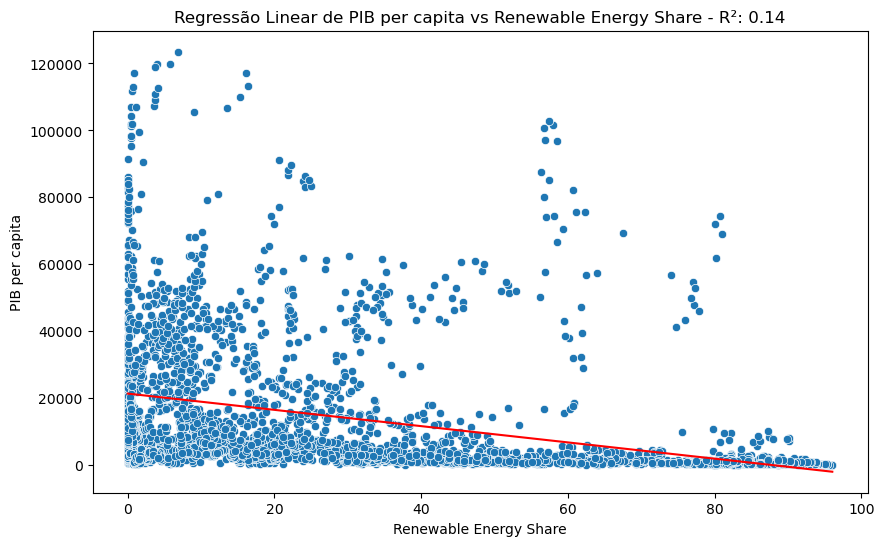

In [8]:
# Variável independente
x_var = 'Renováveis %'

# Variáveis dependentes
y_vars = ['PIB per capita']

# Regressão Linear Univarida para cada variável dependente
for y_var in y_vars:
    # Preparando os dados
    data_filtered = data2[[x_var, y_var]].dropna()
    X = data_filtered[[x_var]]
    y = data_filtered[y_var]

    # Criando e ajustando o modelo
    model = LinearRegression()
    model.fit(X, y)

    # Fazendo previsões
    y_pred = model.predict(X)

    # Calculando R²
    r2 = r2_score(y, y_pred)

    # Plotando gráfico de dispersão com linha de regressão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[x_var], y=y)
    sns.lineplot(x=X[x_var], y=y_pred, color='red')
    plt.title(f'Regressão Linear de {y_var} vs Renewable Energy Share - R²: {r2:.2f}')
    plt.xlabel('Renewable Energy Share')
    plt.ylabel(y_var)
    plt.show()

**1. Verificando a hipótese para países emergentes**

Por conta das altas dispersões desta base de dados, entretando, trabalharemos, com grupos de países que tenham maior semelhança econômica entre si, de maneira a podermos testar melhor a hipótese, com menos distorções.

Primeiramente, vamos testar um grupo das principais economias emergentes.

Para isso, criamos um grupo com as 10 maiores economias emergentes (a lista segue o [ranking](https://https://databankfiles.worldbank.org/public/ddpext_download/GDP.pdf) das maiores economias do mundo em 2022 do Banco Mundial)

In [9]:
Emergentes = data2[data2['País'].isin(['Brazil','India', 'China', 'Russia', 'South Africa', 'Mexico', 'Indonesia', 'Saudi Arabia', 'Turkey', 'Argentina', 'Thailand'])]
Emergentes[Emergentes['Ano']==2019].sort_values(by=['Renováveis %'], ascending=False).reset_index(drop=True)


,País,Ano,Renováveis %,PIB per capita
0,Brazil,2019,47.57,8897.552966
1,India,2019,32.93,2100.751461
2,Thailand,2019,23.96,7817.009671
3,Indonesia,2019,19.09,4135.201531
4,China,2019,14.45,10143.838170
5,Turkey,2019,14.12,9121.515167
6,Argentina,2019,10.74,10056.637940
7,South Africa,2019,10.50,6624.761865
8,Mexico,2019,10.34,9950.450080
9,Saudi Arabia,2019,0.03,23139.797980


Note que, neste grupo, a renda é bem mais homogênea. Ela varia de 3.100 a 9.700 dólares, aproximadamente, entre os recortes do menor e o maior quartil. Igualmente, o desvio padrão (de 5200 para renda média de 7200 dólares) é bem menor do que na média global (em que o desvio padrão foi da ordem de 19.000 para média de US$ 13.000)


In [10]:
Emergentes.describe()

,Ano,Renováveis %,PIB per capita
count,200.000000,200.000000,200.000000
mean,2009.500000,20.226250,7205.231105
std,5.780751,14.432038,5286.778678
min,2000.000000,0.010000,443.314194
25%,2004.750000,10.185000,3137.781417
50%,2009.500000,14.130000,6657.850856
75%,2014.250000,32.512500,9713.209308
max,2019.000000,48.920000,25243.602000


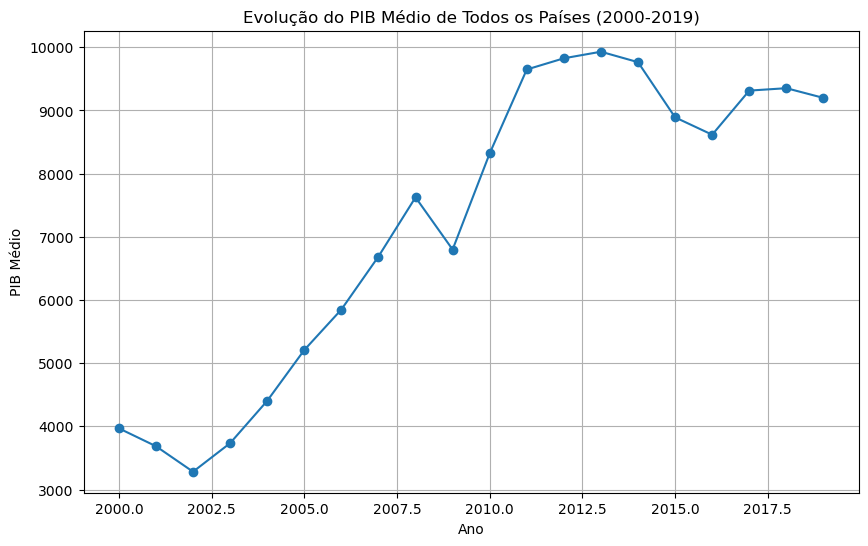

In [11]:
# Calculando o PIB per capita médio do grupo por ano
pib_medio = Emergentes.groupby('Ano')['PIB per capita'].mean()

# Calculando a % de renováveis média por ano
renovaveis_media = Emergentes.groupby('Ano')['Renováveis %'].mean()

# Plotar o gráfico da evolução do PIB
plt.figure(figsize=(10, 6))
plt.plot(pib_medio.index, pib_medio.values, marker='o', linestyle='-')
plt.title('Evolução do PIB Médio de Todos os Países (2000-2019)')
plt.xlabel('Ano')
plt.ylabel('PIB Médio')
plt.grid(True)
plt.show()


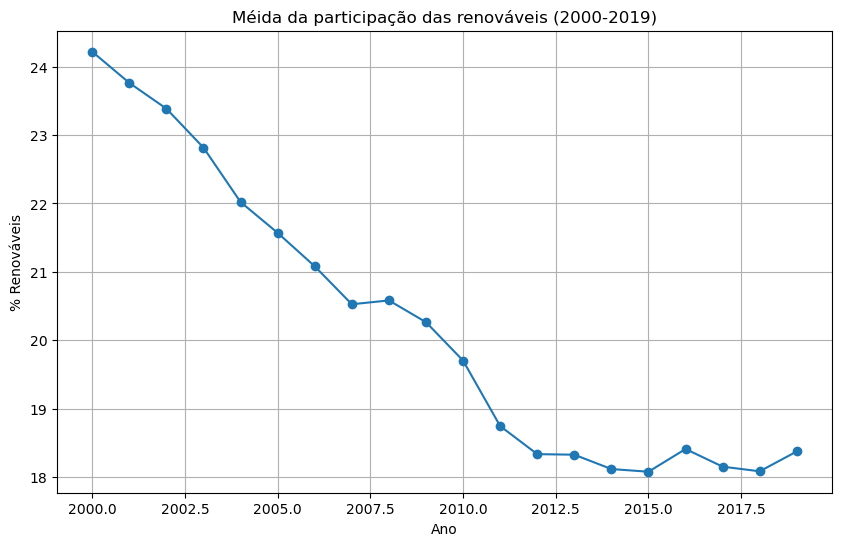

In [12]:

# Plotar o gráfico da evolução das renováveis
plt.figure(figsize=(10, 6))
plt.plot(renovaveis_media.index, renovaveis_media.values, marker='o', linestyle='-')
plt.title('Méida da participação das renováveis (2000-2019)')
plt.xlabel('Ano')
plt.ylabel('% Renováveis')
plt.grid(True)
plt.show()


Note que, na média deste grupo de países, há uma avanço enorme de renda no período. O oposto, entretanto, aconteceu com o uso das energias limpas: a participação delas despencou.

De fato, um gráfico de dispersão correlacionando estas duas variáveis para esse grupo mostra uma correlação negativa entre elas: ou seja, uma cai quando a outra avança, e vice-versa.

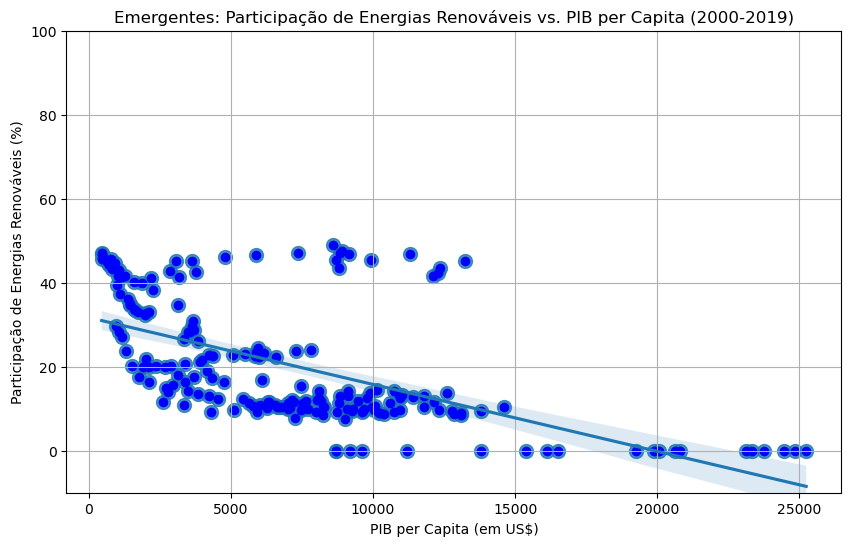

In [13]:

#Grafico de dispersão dos emergentes

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=Emergentes, scatter_kws={'s': 100})

plt.scatter(Emergentes['PIB per capita'], Emergentes['Renováveis %'], color='blue')
plt.title('Emergentes: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(-10, 100)
plt.grid(True)
plt.show()


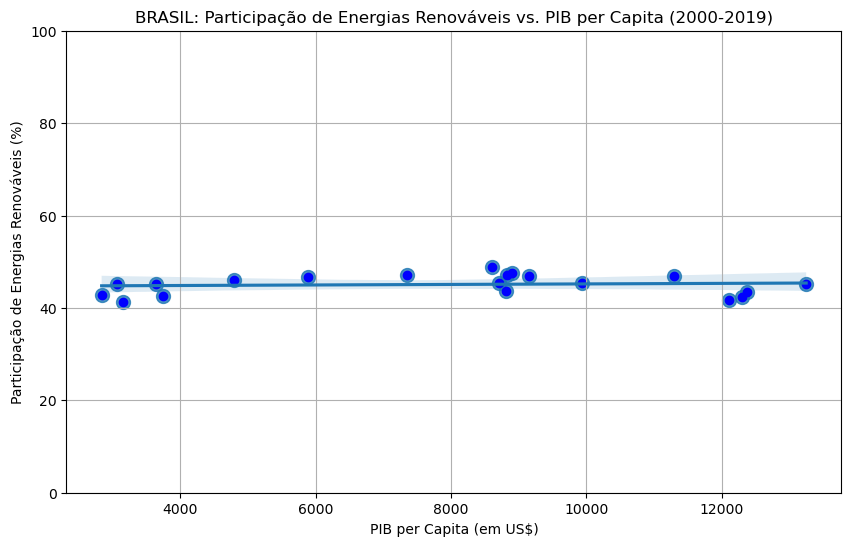

In [14]:

#traçando um gráfico de dispersão só para o Brasil

Brasil = data2[data2['País']=='Brazil'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=Brasil, scatter_kws={'s': 100})

plt.scatter(Brasil['PIB per capita'], Brasil['Renováveis %'], color='blue')
plt.title('BRASIL: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()


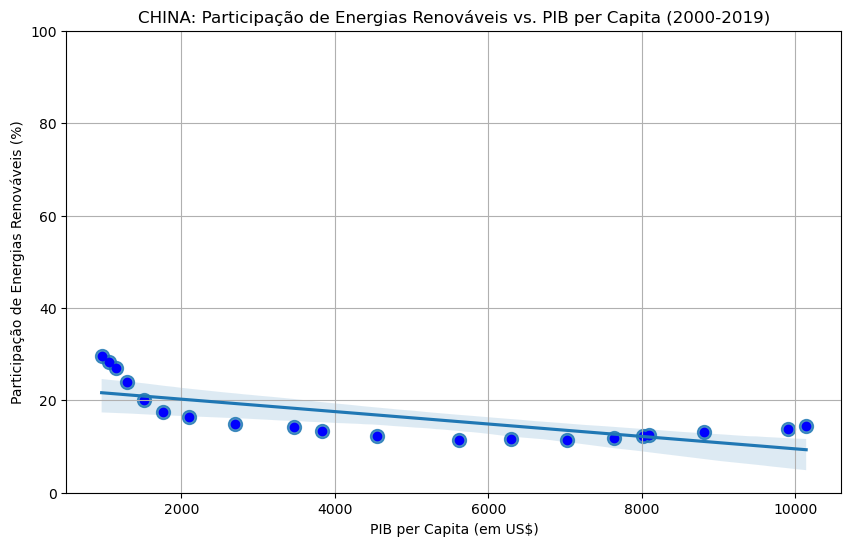

In [15]:
# Só a China:

China = data2[data2['País']=='China'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=China, scatter_kws={'s': 100})

plt.scatter(China['PIB per capita'], China['Renováveis %'], color='blue')
plt.title('CHINA: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

Isto, a princípio, desafia a nossa hipótese, já que não parece haver uma tendência indicando que a ampliação na participação de energias renováveis amplia a renda ou o desenvolvimento econômico, tanto quanto o inverso: ampliar a renda parece reduzir o peso das renováveis.

A pergunta é: esta tendência vale para qualquer economia, ou ela varia de acordo com diferentes perfis de países?

**2. Verificando a hipótese para países desenvolvidos**

Para testar esta pergunta, vamos agora fazer o oposto: selecionar países de alto nível de renda e ver se o comportamento entre evolção do PIB per capita e do consumo de energias renováveis é igual.

Para isso, montamos um novo grupo também reunindo os 10 países desenvolvidos mais ricos listados no ranking das maiores economias do mundo em 2022.

In [16]:
Desenvolvidos = data2[data2['País'].isin(['United States','Japan', 'Germany', 'United Kingdom', 'France', 'Canada', 'Italy', 'Australia','Netherlands','Switzerland', 'Sweden'])].reset_index(drop=True)
Desenvolvidos[Desenvolvidos['Ano']==2019].sort_values(by=['Renováveis %'], ascending=False).reset_index(drop=True)


,País,Ano,Renováveis %,PIB per capita
0,Sweden,2019,52.88,51939.42974
1,Switzerland,2019,24.76,85334.51946
2,Canada,2019,22.11,46338.34096
3,Italy,2019,17.27,33641.63375
4,Germany,2019,17.17,46794.89929
5,France,2019,15.53,40578.64429
6,United Kingdom,2019,12.24,43070.49836
7,United States,2019,10.42,65279.52903
8,Australia,2019,10.13,54875.28596
9,Netherlands,2019,8.54,52476.27325



Note, abaixo, que a discrepância de renda entre eles é também bem menor do que no total global.
Por outro lado, é importante destacar que, a despeito do alto nível de renda, trata-se de um grupo com participação das renováveis em sua matriz energética consideravelmente baixo: a média é de apenas 13%, e, à exceção da Suíça (com 54%), o país mais "limpo" deste grupo tem apenas 24% delas.

É menos do que a média global, de 32%.


In [17]:
Desenvolvidos.describe()


,Ano,Renováveis %,PIB per capita
count,220.000000,220.000000,220.000000
mean,2009.500000,13.672818,44438.662394
std,5.779431,11.701597,13862.812675
min,2000.000000,0.850000,19527.323580
25%,2004.750000,5.597500,35998.276590
50%,2009.500000,9.370000,42447.183425
75%,2014.250000,18.322500,51559.845470
max,2019.000000,52.880000,91254.034760


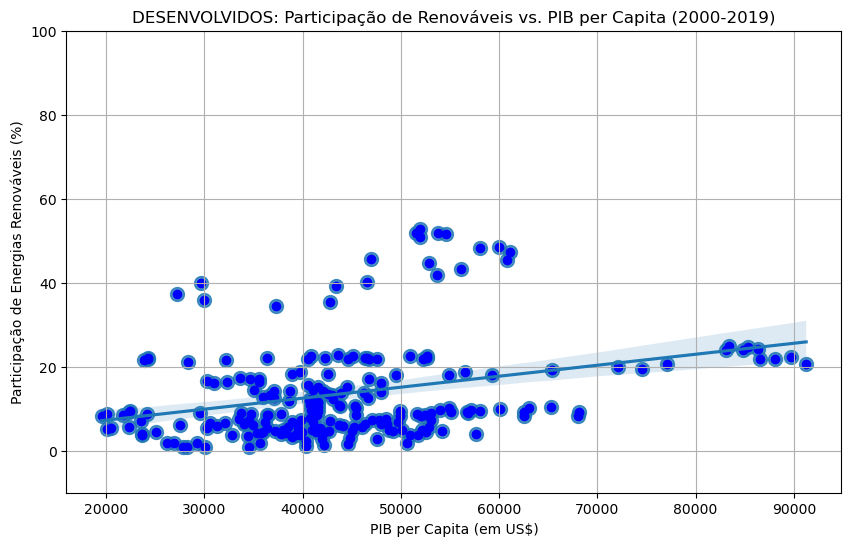

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=Desenvolvidos, scatter_kws={'s': 100})

plt.scatter(Desenvolvidos['PIB per capita'], Desenvolvidos['Renováveis %'], color='blue')
plt.title('DESENVOLVIDOS: Participação de Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(-10, 100)
plt.grid(True)
plt.show()

Veja que para um grupo de economias mais ricas, a correlação se inverte em relação ao que acontece nos emergentes: quanto maior o PIB per capita, maior, também, fica o uso de energias renováveis na matriz energética.

Vamos ver algunas casos particulares, como o de países que têm amplo uso de renováveis e que ampliaram bastante sua base nas últimas décadas. Caso, por exemplo, da França, Alemanha e Suécia, como se vê na tabela:

In [19]:
Desenvolvidos[Desenvolvidos['Ano'].isin([2000,2019])].reset_index(drop=True)

,País,Ano,Renováveis %,PIB per capita
0,Australia,2000,8.42,21697.70848
1,Australia,2019,10.13,54875.28596
2,Canada,2000,22.04,24271.00206
3,Canada,2019,22.11,46338.34096
4,France,2000,9.32,22364.02939
5,France,2019,15.53,40578.64429
6,Germany,2000,3.70,23635.92922
7,Germany,2019,17.17,46794.89929
8,Italy,2000,5.12,20087.59199
9,Italy,2019,17.27,33641.63375


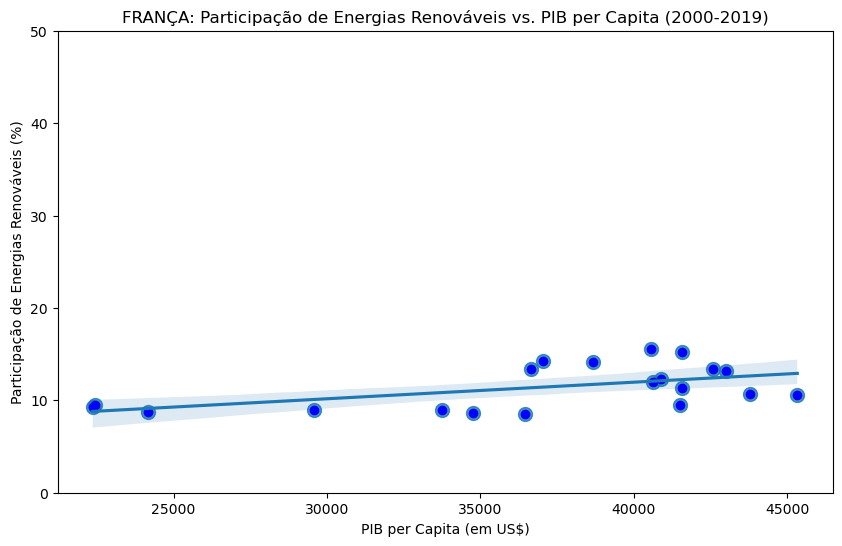

In [20]:

Franca = data2[data2['País']=='France'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=Franca, scatter_kws={'s': 100})

plt.scatter(Franca['PIB per capita'], Franca['Renováveis %'], color='blue')
plt.title('FRANÇA: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 50)
plt.grid(False)
plt.show()

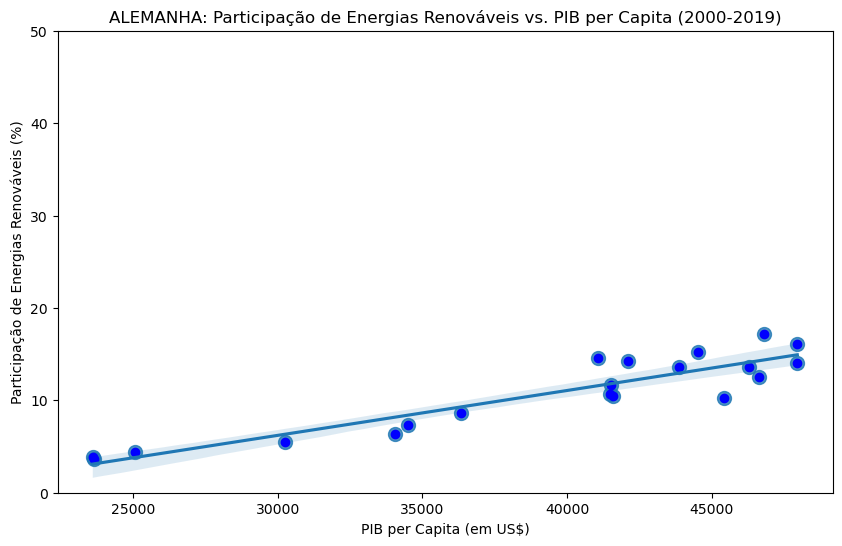

In [21]:
Alemanha = data2[data2['País']=='Germany'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=Alemanha, scatter_kws={'s': 100})

plt.scatter(Alemanha['PIB per capita'], Alemanha['Renováveis %'], color='blue')
plt.title('ALEMANHA: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 50)
plt.grid(False)
plt.show()

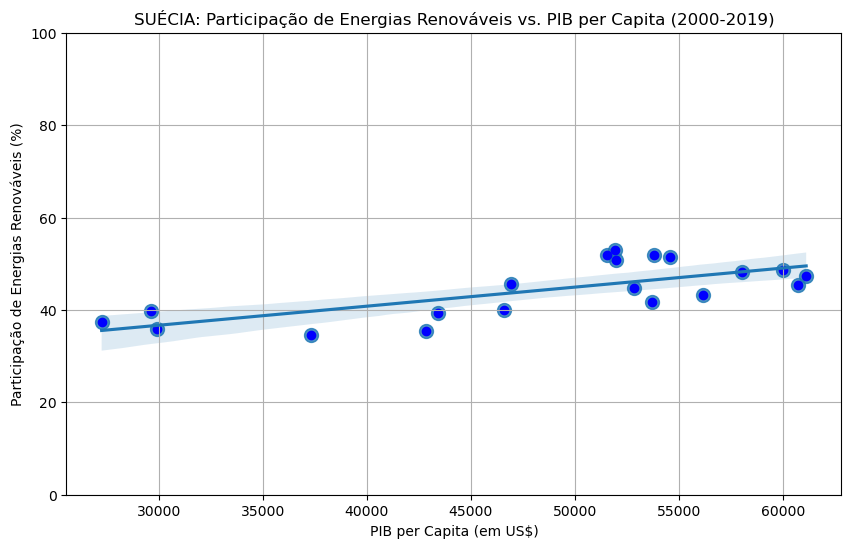

In [22]:
Suecia = data2[data2['País']=='Sweden'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=Suecia, scatter_kws={'s': 100})

plt.scatter(Suecia['PIB per capita'], Suecia['Renováveis %'], color='blue')
plt.title('SUÉCIA: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# Conclusão

Podemos notar, pelos dados mostrados, que não há uma tendência única (quando sequer há alguma) no que diz respeito à evolução da renda em paralelo à evolução da participação das fontes de energias renováveis no consumo de energia de um país.

Há, entretanto, algumas indicações intrigantes: para países de renda média a baixa, essa correlação parece ser negatica.

Quer dizer, conforme estes países enriquecem, e saem da renda baixa para a renda média - que foi o que aconteceu em grande escala com o grupo de economias emergentes selecionados em nossa amostra nas duas últimas décadas em questão - o uso de renováveis tende a se reduzir, em proporção ao consumo total de energia, e não aumentar.

Isso pode estar ligado ao fato de essas fontes estarem ligadas, em sua grande maioria, a tecnologias mais jovens, como os dispositivos de geração eólica e solar, que damandam amplam investimento em pesquisa, desenvolvimento e equipamentos de ponta.

Isto implica que, em um primeiro momento, elas acabam saindo mais caras e mais complexas do que soluções já seculares e de amplo acesso como carvão e petróleo.

Por outro lado, entre os países ricos, acontece o contrário: a renda aumenta conforme aumenta a participação das renováveis.

Pesquisas na área creditam isso ao fato, justamente, do amplo investimento em indústria, tecnologia e pesquisa que demandam, o que têm alto impacto positivo em fatores como a geração de empregos qualificados, melhora da pauta exportadora e do saldo comercial, entre outros.

Em análises futuras sobre esses recortes, seria interessante adicionar dados como geração de emprego, pesquisa em P&D ou evolução das exportações, para ver como estas variáveis reagem à ampliação das renováveis na matriz do país e, em última instância, na solidez de sua economia.